In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [2]:
url = 'http://www.statsci.org/data/general/motorins.txt'

In [10]:
df = pd.read_csv(url, sep = '\t') \
       .assign(frequency = lambda x: x.Claims / x.Insured,
               severity = lambda x: np.where(x.Claims == 0, 0, x.Payment / x.Claims),
               risk_premium = lambda x: x.Payment / x.Insured)

In [19]:
response_freq = df.frequency
response_severity = df.severity
response_rp = df.risk_premium
features = df.iloc[:, :4]

In [24]:
zone_encoder = LabelEncoder()
zone_encoder.fit(features.Zone)
make_encoder = LabelEncoder()
make_encoder.fit(features.Make)

LabelEncoder()

In [25]:
features['Zone'] = zone_encoder.transform(features.Zone)
features['Make'] = make_encoder.transform(features.Make)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    response_severity,
                                                    train_size = 0.8,
                                                    test_size = 0.2,
                                                    random_state = 123)

In [30]:
model = DecisionTreeRegressor(criterion = 'mse',
                              splitter = 'best')

In [31]:
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [32]:
predictions = model.predict(X_test)

In [68]:
results = pd.DataFrame(
                        np.concatenate([np.array(y_test).reshape(437, 1), 
                        np.array(predictions).reshape(437, 1)], axis = 1) 
                        ) 
results.columns = ['actual', 'predicted']
results = results.assign(severity_bands = pd.cut(results.actual, 
                                                 bins = 10,
                                                 labels = np.linspace(1, 10, 10)))

In [77]:
validation = results.groupby('severity_bands') \
                    .agg('sum') 

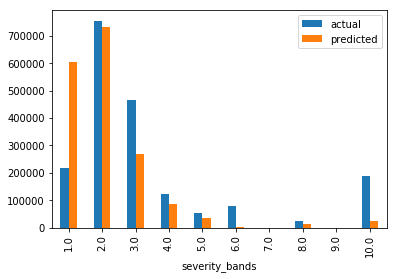

In [78]:
validation.plot.bar()